In [1]:
# Import necessary libraries for analysis purposes

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Load csv file into a pandas dataframe

df_complete = pd.read_csv("../Data projects/Complete Dataset.csv")

In [3]:
# View the first few rows of the dataframe

df_complete.head()

,Unnamed: 0,Year,event_number,electoral_district_number,poll_station,ballot_sequence_number,candidate_vote,poll_station_name,electors_per_station,void_poll,...,election_number,first_name,family_name,candidate_occupation,incumbent_indicator,elected_candidate_indicator,candidate_province,candidate_party,redistribution_boundaries,electoral_district_name
0,0,2015,4200,10001,1,1,39,Freshwater,133,False,...,42,Scott,Andrews,Parliamentarian,True,False,Newfoundland and Labrador,Nil,2013,Avalon
1,1,2015,4200,10001,1,2,9,Freshwater,133,False,...,42,Jeannie,Baldwin,Union Officer,False,False,Newfoundland and Labrador,NDP,2013,Avalon
2,2,2015,4200,10001,1,3,4,Freshwater,133,False,...,42,Lorraine,Barnett,"Director, Regional Affairs",False,False,Newfoundland and Labrador,Conservative,2013,Avalon
3,3,2015,4200,10001,1,4,0,Freshwater,133,False,...,42,Krista,Byrne-Puumala,Environmental Practitioner|Student|Business Owner,False,False,Newfoundland and Labrador,Green,2013,Avalon
4,4,2015,4200,10001,1,5,0,Freshwater,133,False,...,42,Jennifer,McCreath,Civil Servant,False,False,Newfoundland and Labrador,Democratic Forces,2013,Avalon


In [4]:
# Drop the first column 'Unnamed: 0' as it is 
# basically a secondary index

df_complete.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Checking if the data type is correct for each column
# All columns appear to be the correct data types

df_complete.columns.to_series().groupby(df_complete.dtypes).groups

{dtype('bool'): Index(['void_poll', 'no_poll_held', 'merge_indicator', 'incumbent_indicator',
        'elected_candidate_indicator'],
       dtype='object'),
 dtype('int64'): Index(['Year', 'event_number', 'electoral_district_number',
        'ballot_sequence_number', 'candidate_vote', 'electors_per_station',
        'rejected_ballots', 'election_number', 'redistribution_boundaries'],
       dtype='object'),
 dtype('O'): Index(['poll_station', 'poll_station_name', 'first_name', 'family_name',
        'candidate_occupation', 'candidate_province', 'candidate_party',
        'electoral_district_name'],
       dtype='object')}

# District level analysis

Our data is currently at a ballot sequence level. Since, many ballots make up a poll station, and many poll stations make up a district, we will have to aggregate to a district (riding) level in order to start the analysis. We will focus on the following two: 

1. Winning candidate analysis
2. Bulk vote analysis

In [6]:
# Aggregate candidate votes and electors per station
# by Year, district name/number, candidate party and
# elected candidate indicator.

df_district = df_complete.groupby(['Year', 
                                   'elected_candidate_indicator',
                                   'electoral_district_name',
                                   'electoral_district_number',
                                   'candidate_party']).agg({'candidate_vote' : 'sum', 
                                                            'electors_per_station' : 'sum'})

df_district.columns = ['total_candidate_vote', 'electors_per_district']
df_district = df_district.reset_index()

In [7]:
# Create column to show percentage of votes received by 
# each party at a district level.

df_district['percentage_votes'] = df_district['total_candidate_vote']/df_district['electors_per_district']

In [8]:
# Check the newly created dataframe

df_district.head()

,Year,elected_candidate_indicator,electoral_district_name,electoral_district_number,candidate_party,total_candidate_vote,electors_per_district,percentage_votes
0,2015,False,Abbotsford,59001,Green,2416,69299,0.034863
1,2015,False,Abbotsford,59001,Liberal,15777,69299,0.227666
2,2015,False,Abbotsford,59001,MarxLen,109,69299,0.001573
3,2015,False,Abbotsford,59001,NDP,6593,69299,0.095138
4,2015,False,Abitibi--Baie-James--Nunavik--Eeyou,24001,Bloc,6398,63632,0.100547


### Winning candidate analysis

In [9]:
# Create a slice of the above dataframe to include
# the records that indicate winning candidates only

district_winners = df_district.query('elected_candidate_indicator == True')

In [10]:
# Create a color dictionary for plotting.
# Assigned colors to individual parties kept
# in line with party colours.

color_dict = dict({'Liberal':'red',
                   'Conservative':'blue',
                   'Green':'green',
                   'NDP':'orange',
                   'Bloc':'yellow',
                   'Independent':'brown'})

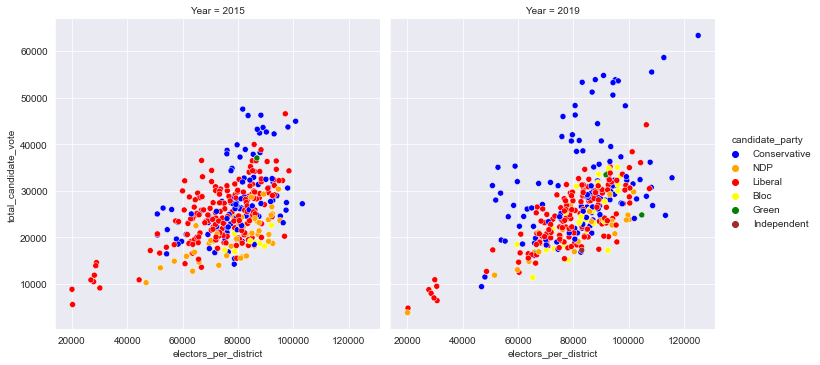

In [11]:
# Scatterplot using electors per district and
# total candidate vote obtained. 

sns.relplot(data=district_winners, 
            x="electors_per_district", 
            y="total_candidate_vote", 
            hue="candidate_party", 
            palette = color_dict, 
            legend='brief',
            kind="scatter", 
            col ='Year')

#### Observations:

1. The winning Conservative candidates have increased their vote share from 2015 to 2019 and have 
   clear majority in many districts.

2. There is an increase in the number of votes and instances for winning candidates from the Bloc party in 2019.

3. There is a decrease in the number of instances for winning candidates from the NDP party in 2019.

4. There is a decrease in the number of votes for winning candidates from the Liberal party in 2019.

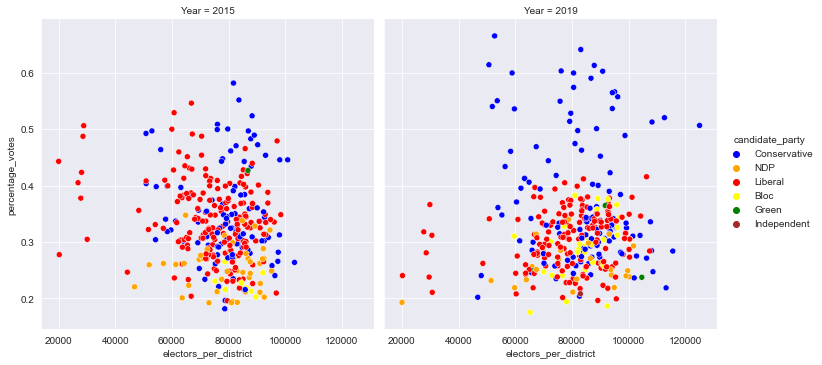

In [12]:
# Scatterplot using electors per district and
# percentage of votes obtained. 

sns.relplot(data=district_winners, 
            x="electors_per_district", 
            y="percentage_votes", 
            hue="candidate_party", 
            palette = color_dict, 
            legend='brief',
            kind="scatter", 
            col ='Year')

#### Observations:

1. The winning Conservative candidates have increased their vote percentage from 2015 to 2019 and have clear majority in many      districts.

2. The winning Liberal candidates had a reduced vote percentage in 2019 when compared to 2015.

3. There is an increase in vote percentage for the winning Bloc candidates in 2019 when compared to 2015. 

4. There are reduced instances for NDP in the 2019 plot above 25% votes indicating reduced vote share for winners. 

### Bulk vote analysis

In [13]:
# There are over 20 dfferent parties that contest an election
# Create another slice of the district level aggregated dataframe
# to only include the parties that contain bulk of the votes ~ 95%.

party_categories = ['NDP', 'Liberal', 'Conservative', 'Bloc', 'Green'] # list of parties that obtained the most votes
bulk_votes = df_district[df_district['candidate_party'].isin(party_categories)] 

bulk_votes.head()

,Year,elected_candidate_indicator,electoral_district_name,electoral_district_number,candidate_party,total_candidate_vote,electors_per_district,percentage_votes
0,2015,False,Abbotsford,59001,Green,2416,69299,0.034863
1,2015,False,Abbotsford,59001,Liberal,15777,69299,0.227666
3,2015,False,Abbotsford,59001,NDP,6593,69299,0.095138
4,2015,False,Abitibi--Baie-James--Nunavik--Eeyou,24001,Bloc,6398,63632,0.100547
5,2015,False,Abitibi--Baie-James--Nunavik--Eeyou,24001,Conservative,3211,63632,0.050462


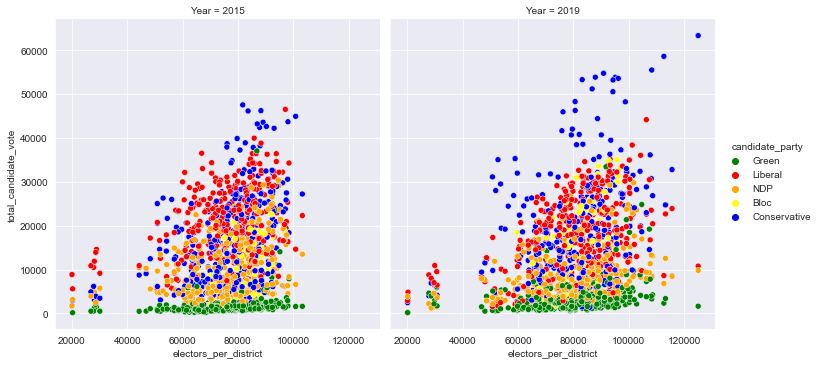

In [14]:
# Scatterplot using electors per district and
# total candidate vote obtained.

sns.relplot(data=bulk_votes, 
            x="electors_per_district", 
            y="total_candidate_vote", 
            hue="candidate_party", 
            palette=color_dict, 
            legend='brief',
            kind="scatter", 
            col = 'Year')

#### Observations:

1. Conservative party seems to have increased their overall vote share in 2019. The high concentration of sub 10,000 votes
   per district has reduced from 2015 and there is an increased concentration of > 40,000 votes per district in 2019. There
   seems to be a general upward shift for them.

2. Liberal party seems to have a lower concentration of > 30,000 votes per district in 2019 compared to 2015.

3. Bloc party seems to have increased their vote share and have generally moved higher in 2019 compared to 2015.

4. NDP seems to have reduced instances of > 20,000 votes per district in 2019 compared to 2015.

5. General slight upward shift for the Green party in 2019 compared to 2015.

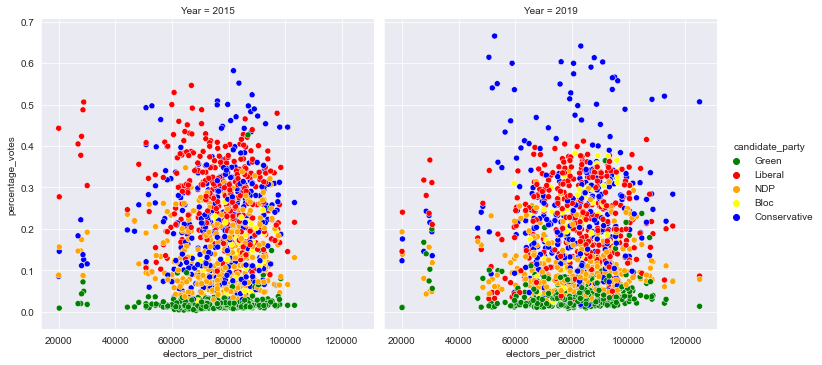

In [15]:
# Scatterplot using electors per district and
# percentage of votes obtained.

sns.relplot(data=bulk_votes, 
            x="electors_per_district", 
            y="percentage_votes", 
            hue="candidate_party", 
            palette=color_dict, 
            legend='brief',
            kind="scatter", 
            col = 'Year')

#### Observations:

1. For the Conservative party there appears to be a clear majority in the > 40% vote percentage per district in 2019. Reduced      instances of < 10% vote percentage in 2019 compared to 2015. 

2. Liberal party has a reduced instances of > 40% vote percentage in 2019.

3. Bloc party has increased instances of > 20% vote percentage in 2019.

4. Green party has a general slight increase in vote percentage in 2019.

5. NDP has fewer instances of > 20% vote percentage in 2019 compared to 2015. 

# What is the political ideology in a particular district?

1. Based on the percentage of votes in a particular district (riding), what is the prevalent political ideology?
2. Has it shifted from 2015 to 2019?

To answer the above questions, we will use K-means algorithm to distinguish clusters based on percentage of votes.

### Clustering using K-means

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset . After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

https://scikit-learn.org/stable/modules/clustering.html#k-means

In [16]:
# Create a dataframe with vote percentages only
# Create using bulk_votes

vote_percent_bulk = pd.DataFrame(pd.pivot_table(bulk_votes, 
                                                values='percentage_votes', 
                                                index=['Year','electoral_district_name'],
                                                columns = 'candidate_party', 
                                                aggfunc='sum', 
                                                fill_value=0).to_records())

vote_percent_bulk.head()

,Year,electoral_district_name,Bloc,Conservative,Green,Liberal,NDP
0,2015,Abbotsford,0.000000,0.335200,0.034863,0.227666,0.095138
1,2015,Abitibi--Baie-James--Nunavik--Eeyou,0.100547,0.050462,0.012242,0.174346,0.200811
2,2015,Abitibi--Témiscamingue,0.116322,0.041281,0.010353,0.177574,0.248722
3,2015,Acadie--Bathurst,0.000000,0.057666,0.017770,0.386907,0.300588
4,2015,Ahuntsic-Cartierville,0.088285,0.048685,0.014121,0.312782,0.200510


In [17]:
# Split the above dataframe into 2015 and 2019 dataframes

bulk_vote_2015 = vote_percent_bulk.query('Year == 2015')
bulk_vote_2019 = vote_percent_bulk.query('Year == 2019')

In [18]:
# Drop the year column from the above two dataframes
# We will use these dataframes to append the cluster values calculated later

bulk_vote_2015_sans_year = bulk_vote_2015.drop('Year', axis=1)
bulk_vote_2019_sans_year = bulk_vote_2019.drop('Year', axis=1)

#### Note: 
Since K-Means is an unsupervised form of machine learning, we will remove all external classification, such as electoral_district_name. In other words, no values besides the vote percentage will be used to determine the clusters.

In [19]:
# Getting dataframes ready for K-means algorithm

X_2015 = pd.DataFrame(bulk_vote_2015[['Conservative', 
                                      'Liberal', 
                                      'NDP', 
                                      'Green',
                                      'Bloc']].values)

X_2019 = pd.DataFrame(bulk_vote_2019[['Conservative', 
                                      'Liberal', 
                                      'NDP', 
                                      'Green',
                                      'Bloc']].values)

#### Note: 
As mentioned above, K-means assumes that all dimensions have an equal variance. Therefore we need to transform the dimensions i.e. percentage of votes among different political parties to have a more Gaussian-like distribution. 

In [20]:
scaler= StandardScaler() #initialize standardization model

X_transformed_2015 = scaler.fit_transform(X_2015) # apply scaling on X_2015
X_transformed_2019 = scaler.fit_transform(X_2019) # apply scaling on X_2019

In [21]:
distortions_2015 = [] # Create list to capture all distortion i.e. distance from the centroid(s)
K = range(1,10) # Give the model a range of values to try for number of clusters/centroids
for k in K:
    kmeanModel = KMeans(n_clusters=k) # instantiate the model
    kmeanModel.fit(X_transformed_2015) # fit the model to the scaled dataframe
    distortions_2015.append(kmeanModel.inertia_) # capture inertia values and append them 
                                                 #to the list initialized at the beginning.

C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


In [22]:
distortions_2019 = [] # Create list to capture all distortion i.e. distance from the centroid(s)
K = range(1,10) # Give the model a range of values to try for number of clusters/centroids
for k in K:
    kmeanModel = KMeans(n_clusters=k) # instantiate the model
    kmeanModel.fit(X_transformed_2019) # fit the model to the scaled dataframe
    distortions_2019.append(kmeanModel.inertia_) # capture inertia values and append them 
                                                 #to the list initialized at the beginning.

C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


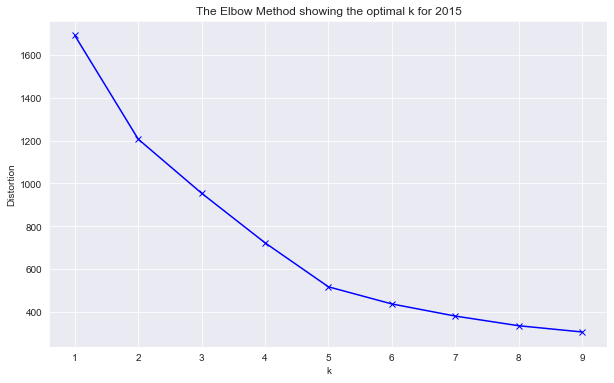

In [23]:
# Plot the distortions captured above for the year 2015

plt.figure(figsize=(10,6))
plt.plot(K, distortions_2015, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for 2015')
plt.show()

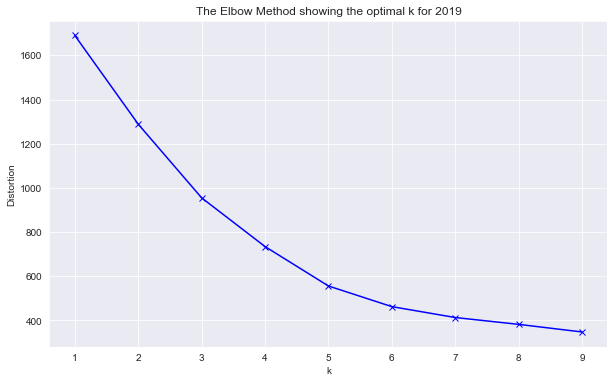

In [24]:
# Plot the distortions captured above for the year 2019

plt.figure(figsize=(10,6))
plt.plot(K, distortions_2019, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for 2019')
plt.show()

#### Note:
In both the above cases, we will choose 5 as the optimal number of clusters. This is because in both the cases, the total amount of distortions show diminishing returns after 5 clusters. An increase in the number of clusters is bound to improve the fit (explain more of the variation), however after a point this results in overfitting. The 'kink' in the elbow reflects that point.

https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [25]:
np.random.seed(42)
model = KMeans(n_clusters=5) # Instantiate the model
model.fit(X_transformed_2015) # Fit the model on 2015 transformed data
cluster = model.predict(X_transformed_2015) # Predict the cluster from the data and save it
bulk_vote_2015_sans_year['cluster'] = cluster # Add to the dataframe and show the result
bulk_vote_2015_sans_year.head()

,electoral_district_name,Bloc,Conservative,Green,Liberal,NDP,cluster
0,Abbotsford,0.000000,0.335200,0.034863,0.227666,0.095138,3
1,Abitibi--Baie-James--Nunavik--Eeyou,0.100547,0.050462,0.012242,0.174346,0.200811,2
2,Abitibi--Témiscamingue,0.116322,0.041281,0.010353,0.177574,0.248722,2
3,Acadie--Bathurst,0.000000,0.057666,0.017770,0.386907,0.300588,1
4,Ahuntsic-Cartierville,0.088285,0.048685,0.014121,0.312782,0.200510,2


In [26]:
np.random.seed(42)
model = KMeans(n_clusters=5) # Instantiate the model
model.fit(X_transformed_2019) # Fit the model on 2019 transformed data
cluster = model.predict(X_transformed_2019) # Predict the cluster from the data and save it
bulk_vote_2019_sans_year['cluster'] = cluster # Add to the dataframe and show the result
bulk_vote_2019_sans_year.head()

,electoral_district_name,Bloc,Conservative,Green,Liberal,NDP,cluster
338,Abbotsford,0.000000,0.333386,0.049050,0.139916,0.109402,0
339,Abitibi--Baie-James--Nunavik--Eeyou,0.175270,0.080337,0.017647,0.137417,0.062921,2
340,Abitibi--Témiscamingue,0.276403,0.091359,0.022037,0.150511,0.061734,2
341,Acadie--Bathurst,0.000000,0.154653,0.063896,0.396597,0.104083,4
342,Ahuntsic-Cartierville,0.143601,0.048127,0.040200,0.346637,0.075362,4


In [27]:
# Unpivot the above bulk_vote_2015_sans_year dataframe 
# for plotting purposes

df_unpivoted_2015 = bulk_vote_2015_sans_year.melt(id_vars=['electoral_district_name','cluster'], 
                                                  var_name='candidate_party', 
                                                  value_name='percentage_of_votes')
df_unpivoted_2015.head()

,electoral_district_name,cluster,candidate_party,percentage_of_votes
0,Abbotsford,3,Bloc,0.000000
1,Abitibi--Baie-James--Nunavik--Eeyou,2,Bloc,0.100547
2,Abitibi--Témiscamingue,2,Bloc,0.116322
3,Acadie--Bathurst,1,Bloc,0.000000
4,Ahuntsic-Cartierville,2,Bloc,0.088285


In [28]:
# Unpivot the above bulk_vote_2019_sans_year dataframe 
# for plotting purposes

df_unpivoted_2019 = bulk_vote_2019_sans_year.melt(id_vars=['electoral_district_name','cluster'], 
                                                  var_name='candidate_party', 
                                                  value_name='percentage_of_votes')

df_unpivoted_2019.head()

,electoral_district_name,cluster,candidate_party,percentage_of_votes
0,Abbotsford,0,Bloc,0.000000
1,Abitibi--Baie-James--Nunavik--Eeyou,2,Bloc,0.175270
2,Abitibi--Témiscamingue,2,Bloc,0.276403
3,Acadie--Bathurst,4,Bloc,0.000000
4,Ahuntsic-Cartierville,4,Bloc,0.143601


In [29]:
# Print the ridings within each cluster for the year 2015

for i in range(5):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(bulk_vote_2015_sans_year[bulk_vote_2015_sans_year['cluster'] == i]['electoral_district_name'].values)))
    print("Total Members:", len(list(bulk_vote_2015_sans_year[bulk_vote_2015_sans_year['cluster'] == i]['electoral_district_name'].values)))
    print()

Cluster: 0
The Members: Ajax | Aurora--Oak Ridges--Richmond Hill | Avalon | Barrie--Springwater--Oro-Medonte | Bay of Quinte | Beauséjour | Bonavista--Burin--Trinity | Brampton Centre | Brampton East | Brampton North | Brampton South | Brampton West | Brossard--Saint-Lambert | Burlington | Calgary Centre | Calgary Confederation | Calgary Skyview | Cambridge | Cape Breton--Canso | Cardigan | Carleton | Central Nova | Charleswood--St. James--Assiniboia--Headingley | Charlottetown | Cloverdale--Langley City | Coast of Bays--Central--Notre Dame | Cumberland--Colchester | Dartmouth--Cole Harbour | Delta | Don Valley East | Don Valley North | Don Valley West | Dorval--Lachine--LaSalle | Edmonton Mill Woods | Eglinton--Lawrence | Egmont | Etobicoke Centre | Etobicoke North | Etobicoke--Lakeshore | Fleetwood--Port Kells | Fredericton | Fundy Royal | Gatineau | Glengarry--Prescott--Russell | Guelph | Halifax West | Hamilton West--Ancaster--Dundas | Hastings--Lennox and Addington | Honoré-Mercie

In [30]:
# Print the ridings within each cluster for the year 2019

for i in range(5):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(bulk_vote_2019_sans_year[bulk_vote_2019_sans_year['cluster'] == i]['electoral_district_name'].values)))
    print("Total Members:", len(list(bulk_vote_2019_sans_year[bulk_vote_2019_sans_year['cluster'] == i]['electoral_district_name'].values)))
    print()

Cluster: 0
The Members: Abbotsford | Banff--Airdrie | Barrie--Innisfil | Battle River--Crowfoot | Battlefords--Lloydminster | Beauce | Bellechasse--Les Etchemins--Lévis | Bow River | Brandon--Souris | Bruce--Grey--Owen Sound | Calgary Centre | Calgary Confederation | Calgary Forest Lawn | Calgary Heritage | Calgary Midnapore | Calgary Nose Hill | Calgary Rocky Ridge | Calgary Shepard | Calgary Signal Hill | Calgary Skyview | Cariboo--Prince George | Carlton Trail--Eagle Creek | Central Okanagan--Similkameen--Nicola | Chatham-Kent--Leamington | Chilliwack--Hope | Cypress Hills--Grasslands | Dauphin--Swan River--Neepawa | Edmonton Griesbach | Edmonton Manning | Edmonton Mill Woods | Edmonton Riverbend | Edmonton West | Edmonton--Wetaskiwin | Elgin--Middlesex--London | Foothills | Fort McMurray--Cold Lake | Fundy Royal | Grande Prairie--Mackenzie | Haldimand--Norfolk | Haliburton--Kawartha Lakes--Brock | Huron--Bruce | Kamloops--Thompson--Cariboo | Kildonan--St. Paul | Lakeland | Lambton-

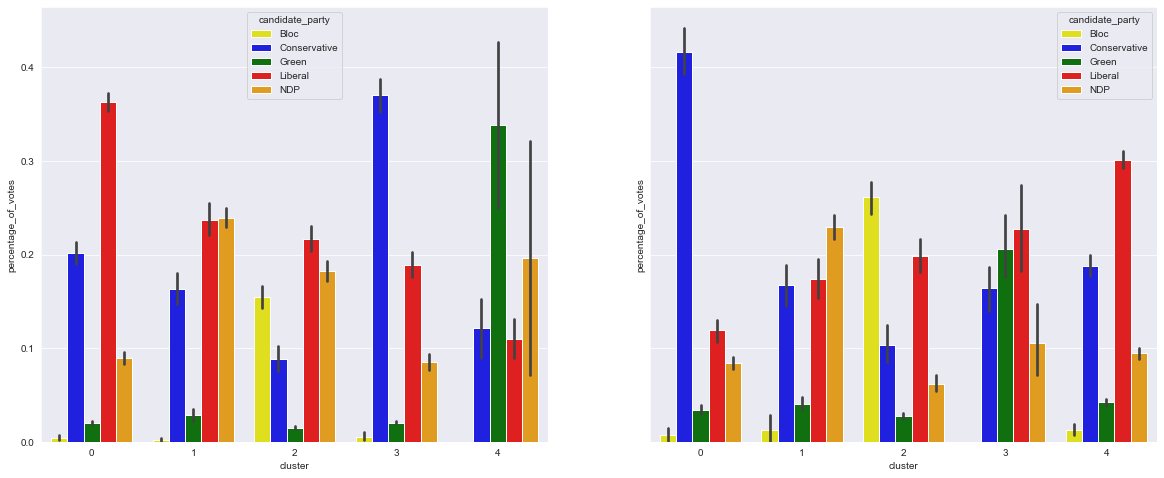

In [31]:
# Plot barplots for 2015 and 2019 showing the different clusters

f, axes = plt.subplots(1, 2, figsize = (20,8), sharey=True)

sns.barplot(x="cluster", 
            y="percentage_of_votes", 
            hue="candidate_party", 
            palette = color_dict, 
            data=df_unpivoted_2015,
            ax=axes[0])

sns.barplot(x="cluster", 
            y="percentage_of_votes", 
            hue="candidate_party", 
            palette = color_dict, 
            data=df_unpivoted_2019,
            ax=axes[1])

#### Note: 

Each barplot above represents the mean of percentage of votes for a particular party in a cluster.

#### Sample observations:

1. Vancouver Granville : Used to be in cluster 1 in 2015. Moved to cluster 4 in 2019. Therefore, the riding went from a Liberal/NDP majority cluster to a Liberal majority cluster. The new cluster shows reduced NDP influence and an increased Green & Conservative party influence.

2. Banff--Airdrie : Used to be in cluster 3 in 2015 and was reported in cluster 0 for 2019. Therefore, the riding went from a Conservative majority to an even higher Conservative majority cluster. Decreased liberal influence and increased Green party influence in the new cluster.
   
3. Vancouver Center : Went from being in cluster 0 in 2015 to cluster 4 in 2019. Therefore, the ridings went from a highly Liberal majority to a less Liberal majority cluster. The cluster that the riding moved to has a greater Green party influence now and slightly reduced Conservative party influence.